[View in Colaboratory](https://colab.research.google.com/github/aminzabardast/Tensorflow-Tutorials/blob/master/3_Simple_FC_Network.ipynb)

# A Simple Fully Connected Artificial Neural Network

As always, the initial step for any python program is to import necessary libraries.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Generating Data

For this example, a 2D data clound will be generatied. 1 dimension will be provided as training data (`xs`) and the other dimension will be the truth value (`ys`).

A seed value will be set to make sure that the result is re-generatable. The data cloud mentioned above will follow a parabolic function ( $y=x^2$ ) with added noise generated from a normal distribution with a $0$ mean and $0.5$ standard deviation.

In [0]:
np.random.seed(seed=23)
xs = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, .1, size=xs.shape)
ys = np.square(xs) - 0.5 + noise

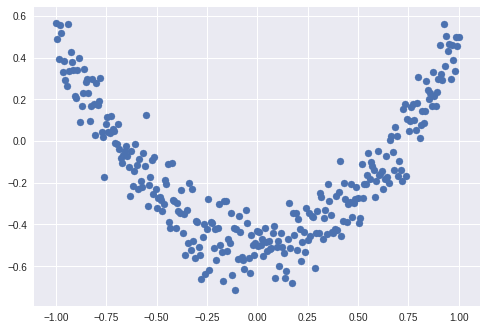

In [0]:
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.scatter(xs, ys)
plt.ion()
plt.show()

## Placeholders

Placeholders will be used for introducing data into the network. Shape of the placeholders are given in advance. Using `None` for a dimentions will keep the size of that dimention free.

In [0]:
xp = tf.placeholder(tf.float32, shape=[None,1])
yp = tf.placeholder(tf.float32, shape=[None,1])

## Defining A Layer

A neuron in a fully connected (FC) network will recieve all the outputs from neurons in previous layer and sends its output to all neurons in next layer. Mathematically, a FC layer is a matrix multiplication which recieves a vector of size $n$ and multiplies it to a transition matrix with $n \times m$ dimentions. This transition matrix is called **Weights**. Then these wrights will be summed with a **Bias** vecor of size $m$ returning a vector of size $m$.

$$
 \begin{pmatrix}
  w_{1,1} & w_{1,2} & \cdots & w_{1,n} \\
  w_{2,1} & w_{2,2} & \cdots & w_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  w_{m,1} & w_{m,2} & \cdots & w_{m,n} 
 \end{pmatrix}
  \begin{pmatrix}
  i_{1,1}\\
  i_{2,1}\\
  \vdots\\
  i_{n,1} 
 \end{pmatrix}
 +
 \begin{pmatrix}
  b_{1,1}\\
  b_{2,1}\\
  \vdots\\
  b_{m,1} 
 \end{pmatrix}
 =
  \begin{pmatrix}
  o_{1,1}\\
  o_{2,1}\\
  \vdots\\
  o_{m,1} 
 \end{pmatrix}
$$

The whole calculation should also go through an activation function (or a non-liniarity).

For simplicity, following notation will be used. $W_{m, n}$ are the weights, $I_{n, 1}$ is the input vector, $B_{m,1}$ is the biases vector, $O_{m, 1}$ is output vector and $f(.)$ is the activation function.

$$
f\big(L_{m,n} \times I_{n,1} + B_{m,1}\big) = O_{m,1}
$$

Since our network will have multiple FC layers, and to avoid repetition, the logic of creating a layer ill be enclosed in a function. To create each layer, we need the the input vector, input vector size, output vector size, activation function, and a seed value to make sure the result is re-generatable.

In [0]:
def add_layer(input, in_size, out_size, activation_function = None, seed = None):
    weights = tf.Variable(tf.random_normal([in_size, out_size], seed=seed))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_plus_b = tf.matmul(input, weights) + biases
    output = activation_function(wx_plus_b) if activation_function else wx_plus_b
    return output

## Adding Layers

Now, the network can have as many layers as required by using the `add_layer` function defined previously.
Target structure will have 3 FC hidden layers each having 3, 10, and 3 neurons respectively.

![Image of FC ANN](https://raw.githubusercontent.com/aminzabardast/Tensorflow-Tutorials/master/figures/fcann-1-3-10-3-1.png)

Like before, a seed will be added to make sure the result is re-generatable.

In [0]:
# Creating layer 1. input of Layer 1 should be the placeholder for data
l1 = add_layer(xp,1,3, tf.nn.relu,seed=2)
# Creating layer 2. input of Layer 2 should be the output of layer 1.
l2 = add_layer(l1, 3, 10, tf.nn.relu,seed=2)
# Creating layer 3.
l3 = add_layer(l2, 10, 3, tf.nn.relu,seed=2)
# Creating output layer.
prediction = add_layer(l3, 3, 1, seed=2)

## Creating Loss Function And Optimizer

The loss function would be a simple **Mean Squared Error (MSE)** and optimizer a basic **Gradient Descent Optimizer**.

In [0]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(yp-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss=loss)

## Running the Network

Before iterating, all variables of our structure should be initialized using `global_variables_initializer()` function.

Also, the value of loss will be calculated in each itteration so the descent of loss can be plotted in the end.

In [0]:
# Keeping loss values in a list
losses = []

# Initializing variables and creating session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Iterating.
for i in range(10000):
    sess.run(train_step, feed_dict={xp: xs, yp: ys})
    # Keeping loss value at each iteration.
    losses.append(sess.run(loss, feed_dict={xp: xs, yp: ys}))
    # reporting every 1000 epochs.
    if i == 0 or (i+1) % 1000 == 0:
      print('Epoch: %d\t Loss: %f' % (i+1, losses[-1]))

Epoch: 1	 Loss: 0.216067
Epoch: 1000	 Loss: 0.010316
Epoch: 2000	 Loss: 0.009947
Epoch: 3000	 Loss: 0.009707
Epoch: 4000	 Loss: 0.009450
Epoch: 5000	 Loss: 0.009193
Epoch: 6000	 Loss: 0.009185
Epoch: 7000	 Loss: 0.009230
Epoch: 8000	 Loss: 0.009082
Epoch: 9000	 Loss: 0.009181
Epoch: 10000	 Loss: 0.009174


Plotting the data and the loss.

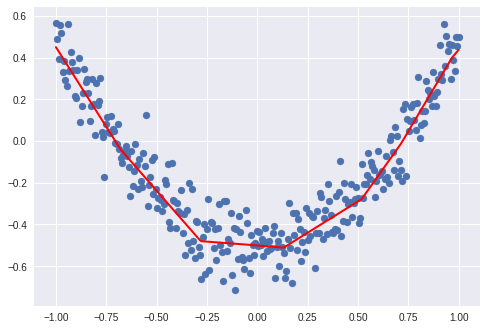

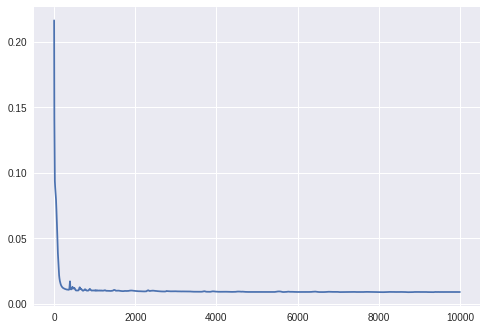

In [0]:
# Plotting the predicted values onto the data
plt.figure()
plt.scatter(xs,ys)
prediction_values = sess.run(prediction, {xp:xs})
lines = plt.plot(xs, prediction_values, 'r', lw=2)

# Plotting the Loss Descent
plt.figure()
plt.plot(losses)